In [1]:
import load_nlfff

In [2]:
data = load_nlfff.nlfff("/Users/mgjeon/workspace/AR11158/isee/11158_20110215_013600.nc")

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


In [3]:
data.nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    NOAA: 11158
    year_month_day_time: 2011_2_15_13600
    project: ISEE Database for Nonlinear Force-Free Field of Solar Active Region
    production_date: 2023-03-20
    version: v1.2
    data_doi: 10.34515/DATA.HSC-00000
    http_link: https://hinode.isee.nagoya-u.ac.jp/nlfff_database/
    Distributor: Hinode Science Center, Institute for Space-Earth Environmental Research, Nagoya University
    dimensions(sizes): x(513), y(257), z(257)
    variables(dimensions): float64 x(x), float64 y(y), float64 z(z), float64 Bx(z, y, x), float64 By(z, y, x), float64 Bz(z, y, x), float64 Bx_pot(z, y, x), float64 By_pot(z, y, x), float64 Bz_pot(z, y, x)
    groups: 

In [4]:
data.info()

NOAA 11158
year_month_day_time 2011_2_15_13600
project ISEE Database for Nonlinear Force-Free Field of Solar Active Region
production_date 2023-03-20
version v1.2
data_doi 10.34515/DATA.HSC-00000
http_link https://hinode.isee.nagoya-u.ac.jp/nlfff_database/
Distributor Hinode Science Center, Institute for Space-Earth Environmental Research, Nagoya University


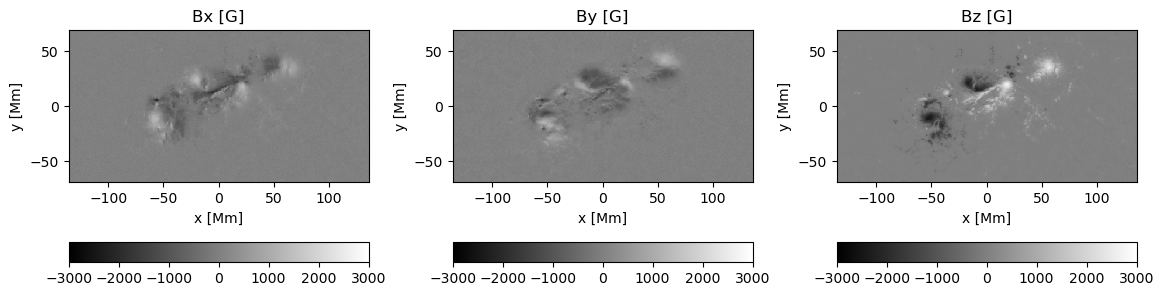

In [5]:
data.plot()

In [6]:
vars(data).keys()

dict_keys(['filename', 'nc', 'NOAA', 'year_month_day_time', 'project', 'production_date', 'version', 'data_doi', 'http_link', 'Distributor', 'x', 'y', 'z', 'bx', 'by', 'bz', 'bx_pot', 'by_pot', 'bz_pot'])

In [7]:
from scipy.io import netcdf_file

In [8]:
fname = 'b.nc'

In [9]:
f = netcdf_file(fname, 'w')

In [10]:
import numpy as np

In [11]:
x = np.array(data.x)
y = np.array(data.y)
z = np.array(data.z)

In [12]:
nx = len(x)
ny = len(y)
nz = len(z)

In [13]:
nx, ny, nz

(513, 257, 257)

In [14]:
f.createDimension('x', nx)
f.createDimension('y', ny)
f.createDimension('z', nz)

In [15]:
xv = f.createVariable('x', 'f', ('x',))
yv = f.createVariable('y', 'f', ('y',))
zv = f.createVariable('z', 'f', ('z',))

In [16]:
xv[:] = x 
yv[:] = y 
zv[:] = z

In [17]:
bx = np.array(data.bx)
by = np.array(data.by)
bz = np.array(data.bz)

In [18]:
bxv = f.createVariable('bx', 'f', ('z', 'y', 'x'))
byv = f.createVariable('by', 'f', ('z', 'y', 'x'))
bzv = f.createVariable('bz', 'f', ('z', 'y', 'x'))

In [19]:
bxv[:, :, :] = bx.transpose(2, 1, 0)
byv[:, :, :] = by.transpose(2, 1, 0)
bzv[:, :, :] = bz.transpose(2, 1, 0)

In [20]:
f.close()

In [21]:
import netCDF4

In [22]:
nc=netCDF4.Dataset(fname,'r')

In [23]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(513), y(257), z(257)
    variables(dimensions): float32 x(x), float32 bx(z, y, x), float32 by(z, y, x), float32 bz(z, y, x), float32 y(y), float32 z(z)
    groups: 